In [1]:
import ROOT
import numpy as np
import scipy
import matplotlib.pyplot as plt
from array import array

In [66]:
savefig = 1

In [2]:
file_path = "../pythia8314/examples/SM_ee_2S_ee_500mm.root"

In [3]:
t1=ROOT.TChain("t1")

In [4]:
t1.AddFile(file_path)

1

In [5]:
## Define a new tree for other purposes

In [6]:
t2 = ROOT.TChain("t1")

In [7]:
t2.AddFile(file_path)

1

In [8]:
ientry = t1.GetEntries()
ientry

829421

In [114]:
final_higgs_energy = []
final_higgs_x = []
final_higgs_y = []
final_higgs_z = []
final_higgs_theta = []
final_higgs_phi = []
final_higgs_px = []
final_higgs_py = []
final_higgs_pz = []
final_higgs_pid = []
final_higgs_entry = []

In [115]:
final_zb_energy = []
final_zb_x = []
final_zb_y = []
final_zb_z = []
final_zb_theta = []
final_zb_phi = []
final_zb_px = []
final_zb_py = []
final_zb_pz = []
final_zb_pid = []
final_zb_entry = []

In [116]:
for jentry in range(0,ientry):
    t1.GetEntry(jentry)
    if(t1.pid==25):
        if(len(t1.MotherList)==1): continue
        dl = np.unique(t1.DaughterListRec)
        pos = t1.list
        for i in range(0,len(dl)):
            t2.GetEntry(jentry-pos+int(dl[i]))
            if(t2.isFinal==0): continue
            final_higgs_energy.append(t2.energy)
            final_higgs_x.append(t2.x)
            final_higgs_y.append(t2.y)
            final_higgs_z.append(t2.z)
            final_higgs_theta.append(t2.theta)
            final_higgs_phi.append(t2.phi)
            final_higgs_pid.append(t2.pid)
            final_higgs_px.append(t2.px)
            final_higgs_py.append(t2.py)
            final_higgs_pz.append(t2.pz)
            final_higgs_entry.append(jentry)


In [117]:
for jentry in range(0,ientry):
    t1.GetEntry(jentry)
    if(t1.pid==23):
        if(len(t1.MotherList)==1): continue
        dl = np.unique(t1.DaughterListRec)
        pos = t1.list
        for i in range(0,len(dl)):
            t2.GetEntry(jentry-pos+int(dl[i]))
            if(t2.isFinal==0): continue
            final_zb_energy.append(t2.energy)
            final_zb_x.append(t2.x)
            final_zb_y.append(t2.y)
            final_zb_z.append(t2.z)
            final_zb_theta.append(t2.theta)
            final_zb_phi.append(t2.phi)
            final_zb_pid.append(t2.pid)
            final_zb_px.append(t2.px)
            final_zb_py.append(t2.py)
            final_zb_pz.append(t2.pz)
            final_zb_entry.append(jentry)


In [118]:
Nhiggs = len(final_higgs_energy)

In [119]:
Nzb = len(final_zb_energy)

In [120]:
zb_lowe_pid = []
zb_lowe_x = []
zb_lowe_y = []
zb_lowe_z = []
higgs_lowe_pid = []
higgs_lowe_x = []
higgs_lowe_y = []
higgs_lowe_z = []

In [121]:
for i in range(0,Nzb):
    if (final_zb_energy[i]>1): continue
    zb_lowe_pid.append(final_zb_pid[i])
    zb_lowe_x.append(final_zb_x[i])
    zb_lowe_y.append(final_zb_y[i])
    zb_lowe_z.append(final_zb_z[i])

In [122]:
for i in range(0,Nhiggs):
    if (final_higgs_energy[i]>1): continue
    higgs_lowe_pid.append(final_higgs_pid[i])
    higgs_lowe_x.append(final_higgs_x[i])
    higgs_lowe_y.append(final_higgs_y[i])
    higgs_lowe_z.append(final_higgs_z[i])

In [123]:
np.unique(zb_lowe_pid)

array([-211,  -11,   11,   13,   22,  211])

In [124]:
zb_particle = []
higgs_particle = []

In [125]:
for i in range(0,len(higgs_lowe_pid)):
    if(higgs_lowe_pid[i] == -211): higgs_particle.append("pion-")
    if(higgs_lowe_pid[i] == 211): higgs_particle.append("pion+")
    if(higgs_lowe_pid[i] == -11): higgs_particle.append("positron")
    if(higgs_lowe_pid[i] == 11): higgs_particle.append("electron")
    if(higgs_lowe_pid[i] == 13): higgs_particle.append("muon")
    if(higgs_lowe_pid[i] == 22): higgs_particle.append("gamma")

In [126]:
for i in range(0,len(zb_lowe_pid)):
    if(zb_lowe_pid[i] == -211): zb_particle.append("pion-")
    if(zb_lowe_pid[i] == 211): zb_particle.append("pion+")
    if(zb_lowe_pid[i] == -11): zb_particle.append("positron")
    if(zb_lowe_pid[i] == 11): zb_particle.append("electron")
    if(zb_lowe_pid[i] == 13): zb_particle.append("muon")
    if(zb_lowe_pid[i] == 22): zb_particle.append("gamma")

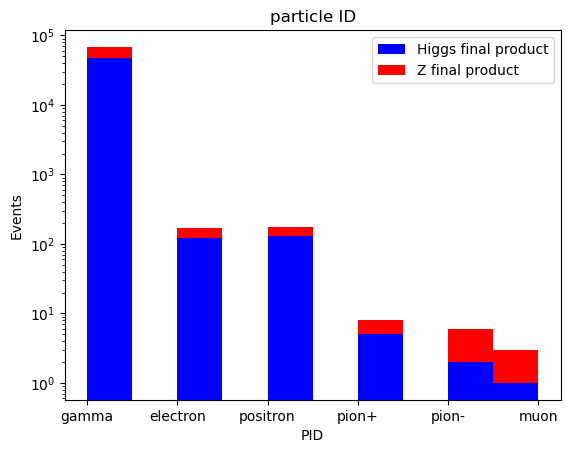

In [127]:
data = [higgs_particle,zb_particle]
colors = ["blue","red"]
labels = ["Higgs final product","Z final product"]
plt.hist(data,stacked = True,color = colors, label = labels,log = True)
plt.title("particle ID")
plt.xlabel("PID")
plt.ylabel("Events")
plt.legend()
if(savefig==1): plt.savefig("particle ID.pdf")

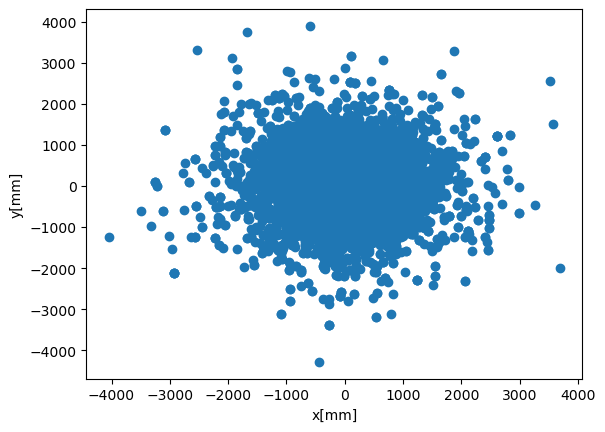

In [128]:
plt.scatter(higgs_lowe_x,higgs_lowe_y)
plt.xlabel("x[mm]")
plt.ylabel("y[mm]")
if(savefig==1): plt.savefig("production vertex for higgs final product.pdf")

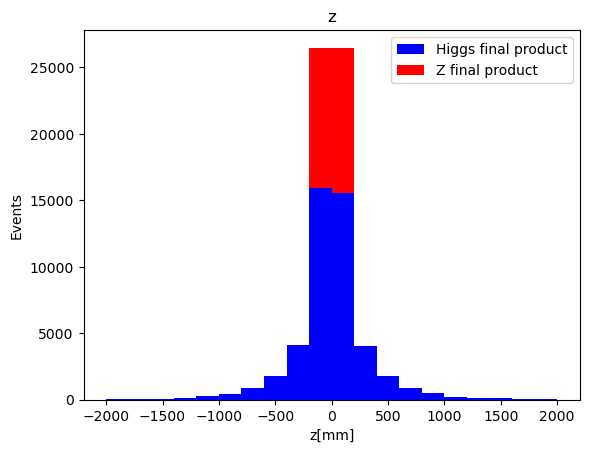

In [129]:
data = [higgs_lowe_z,zb_lowe_z]
colors = ["blue","red"]
labels = ["Higgs final product","Z final product"]
plt.hist(data, bins = 20, range = (-2000,2000),stacked = True, color = colors, label = labels)
plt.title("z")
plt.xlabel("z[mm]")
plt.ylabel("Events")
plt.legend()
if(savefig==1): plt.savefig("production z.pdf")

In [130]:
## energy sum

In [207]:
higgs_energy_sum = []
zb_energy_sum = []
higgs_px_sum = []
higgs_py_sum = []
higgs_pz_sum = []
zb_px_sum = []
zb_py_sum = []
zb_pz_sum = []

In [208]:
flag_entry = final_higgs_entry[0]
flag_energy = 0
flag_px = 0
flag_py = 0
flag_pz = 0
for i in range(0,Nhiggs):
    if(final_higgs_entry[i]==flag_entry):
        flag_energy = flag_energy+final_higgs_energy[i]
        flag_px = flag_px+final_higgs_px[i]
        flag_py = flag_py+final_higgs_py[i]
        flag_pz = flag_pz+final_higgs_pz[i]
    elif(final_higgs_entry[i]!=flag_entry):
        higgs_energy_sum.append(flag_energy)
        higgs_px_sum.append(flag_px)
        higgs_py_sum.append(flag_py)
        higgs_pz_sum.append(flag_pz)
        flag_entry = final_higgs_entry[i]
        flag_energy = final_higgs_energy[i]
        flag_px = final_higgs_px[i]
        flag_py = final_higgs_py[i]
        flag_pz = final_higgs_pz[i]
    if(i==Nhiggs-1):
        higgs_energy_sum.append(flag_energy)
        higgs_px_sum.append(flag_px)
        higgs_py_sum.append(flag_py)
        higgs_pz_sum.append(flag_pz)

In [209]:
flag_entry = final_zb_entry[0]
flag_energy = 0
flag_px = 0
flag_py = 0
flag_pz = 0
for i in range(0,Nzb):
    if(final_zb_entry[i]==flag_entry):
        flag_energy = flag_energy+final_zb_energy[i]
        flag_px = flag_px+final_zb_px[i]
        flag_py = flag_py+final_zb_py[i]
        flag_pz = flag_pz+final_zb_pz[i]
    elif(final_zb_entry[i]!=flag_entry):
        zb_energy_sum.append(flag_energy)
        zb_px_sum.append(flag_px)
        zb_py_sum.append(flag_py)
        zb_pz_sum.append(flag_pz)
        flag_entry = final_zb_entry[i]
        flag_energy = final_zb_energy[i]
        flag_px = final_zb_px[i]
        flag_py = final_zb_py[i]
        flag_pz = final_zb_pz[i]
    if(i==Nzb-1):
        zb_energy_sum.append(flag_energy)
        zb_px_sum.append(flag_px)
        zb_py_sum.append(flag_py)
        zb_pz_sum.append(flag_pz)

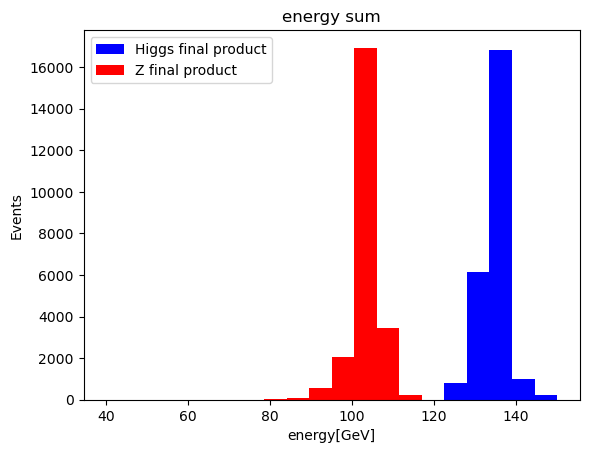

In [210]:
data = [higgs_energy_sum,zb_energy_sum]
colors = ["blue","red"]
labels = ["Higgs final product","Z final product"]
plt.hist(data, bins = 20, range = (40,150),stacked = True, color = colors, label = labels)
plt.title("energy sum")
plt.xlabel("energy[GeV]")
plt.ylabel("Events")
plt.legend()
if(savefig==1): plt.savefig("energy sum.pdf")

In [218]:
higgs_inv = []
zb_inv = []

In [219]:
for i in range(0,len(higgs_px_sum)):
    higgs_inv.append(np.sqrt(higgs_energy_sum[i]**2-(higgs_px_sum[i]**2+higgs_py_sum[i]**2+higgs_pz_sum[i]**2)))

In [221]:
for i in range(0,len(zb_px_sum)):
    zb_inv.append(np.sqrt(zb_energy_sum[i]**2-(zb_px_sum[i]**2+zb_py_sum[i]**2+zb_pz_sum[i]**2)))

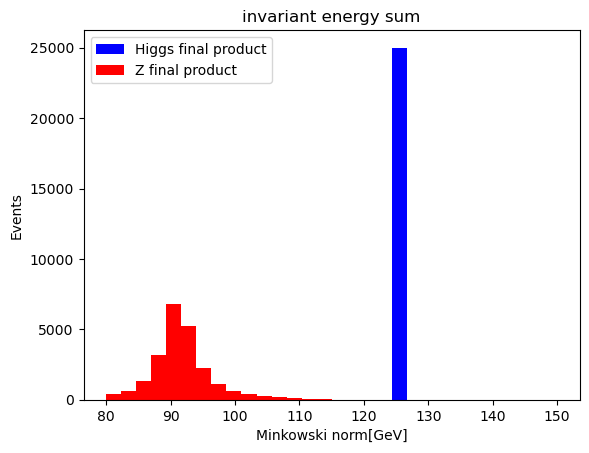

In [225]:
data = [higgs_inv,zb_inv]
colors = ["blue","red"]
labels = ["Higgs final product","Z final product"]
plt.hist(data, bins = 30, range = (80,150),stacked = True, color = colors, label = labels)
plt.title("invariant energy sum")
plt.xlabel("Minkowski norm[GeV]")
plt.ylabel("Events")
plt.legend()
if(savefig==1): plt.savefig("invaraint energy sum.pdf")